# Classification - advanced notebook

Krzysztof Czarnowus, 26.11.2024

used dataset: https://www.kaggle.com/datasets/team-ai/spam-text-message-classification

Dataset contains messages and their classification as spam.

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import time
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

In [180]:
def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

df = pd.read_csv('spam_dataset.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Preprocessing data

Deleting punctuation, tokenizing words with TfidfVectorizer, which is a bit better that CountVectorizer, as it valuates frequency of the words and gives rare ones bigger importancy.

In [181]:
df['Message'] = df['Message'].apply(remove_punctuation)

X = df['Message']
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

### Using standard Logistic regression

As in primary notebook.

In [182]:
model = LogisticRegression()
model.fit(X_train, y_train)

start = time.time()
y_exp = model.predict(X_test)
end = time.time()

time_1 = end-start
acc_1 = accuracy_score(y_test, y_exp)

print("Using standard logistic regression - results\n")
print("Accuracy: ", acc_1)
print("Time of process: ", time_1)

Using standard logistic regression - results

Accuracy:  0.9635167464114832
Time of process:  0.0006620883941650391


### Visualization of most non-spam words

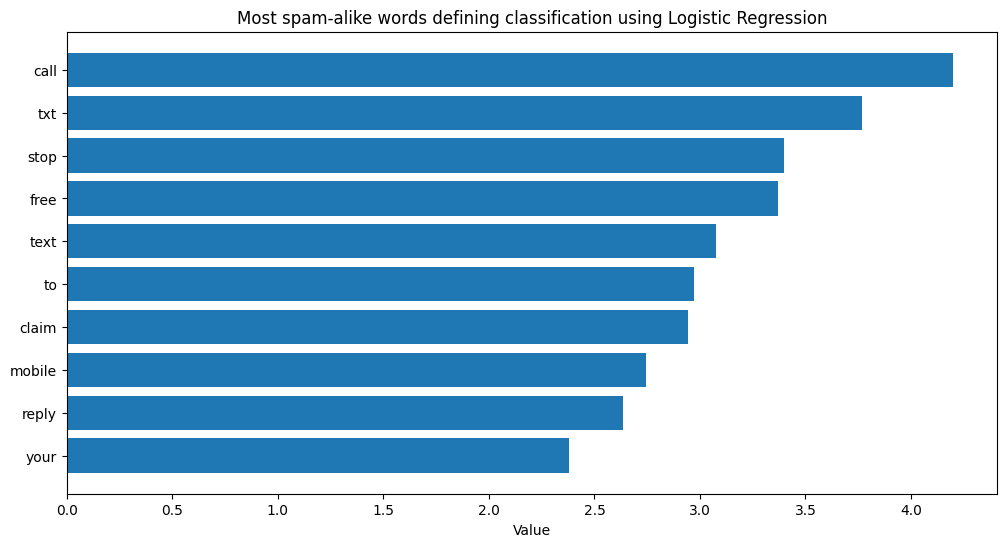

In [183]:
words = vectorizer.get_feature_names_out()
val = model.coef_[0]

w = np.argsort(val)[-10:]

plt.figure(figsize=(12, 6))
plt.barh(words[w], val[w])
plt.xlabel('Value')
plt.title('Most spam-alike words defining classification using Logistic Regression')

plt.show()

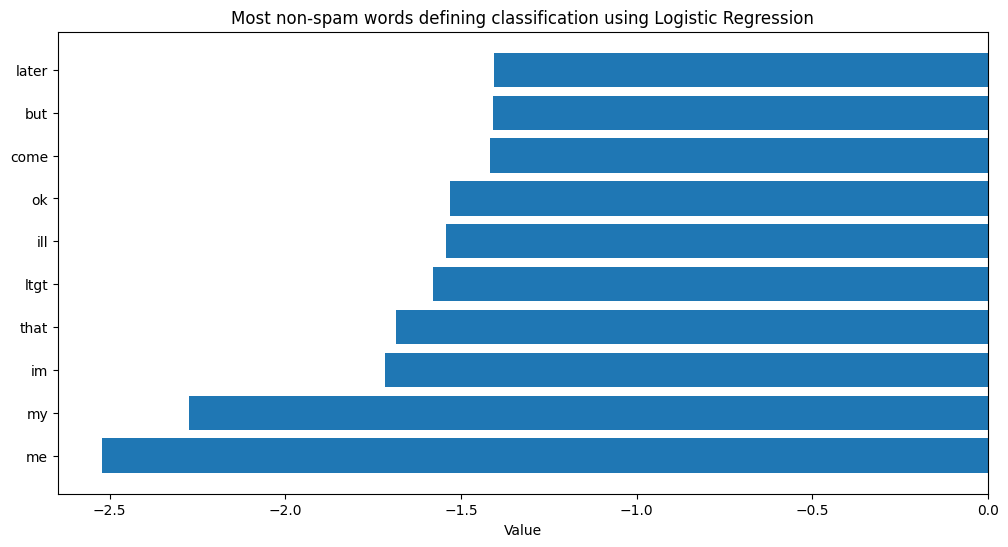

In [184]:
w = np.argsort(val)[:10]

plt.figure(figsize=(12, 6))
plt.barh(words[w], val[w])
plt.xlabel('Value')
plt.title('Most non-spam words defining classification using Logistic Regression')

plt.show()

### Using DecisionTreeClassifier

DecisionTreeClassifier is non-linear classifier.

In [185]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

start = time.time()
y_exp = model.predict(X_test)
end = time.time()

time_2 = end-start
acc_2 = accuracy_score(y_test, y_exp)

print("Using decision tree classifier - results\n")
print("Accuracy: ", acc_2)
print("Time of process: ", time_2)
print("\nTree depth: ", model.get_depth())
print("Number of leaves: ", model.get_n_leaves())

Using decision tree classifier - results

Accuracy:  0.9575358851674641
Time of process:  0.0008554458618164062

Tree depth:  56
Number of leaves:  100


### Checking importancy of max_depth parameter in DecisionTreeClassifier

If model is over-trained, lower max_depth could show better accuracy.

In [186]:
list = []

for d in range (5, 60):
    model = DecisionTreeClassifier(max_depth = d)
    model.fit(X_train, y_train)
    y_exp = model.predict(X_test)

    acc = accuracy_score(y_test, y_exp)
    depth = model.get_depth()
    list.append((d, acc))

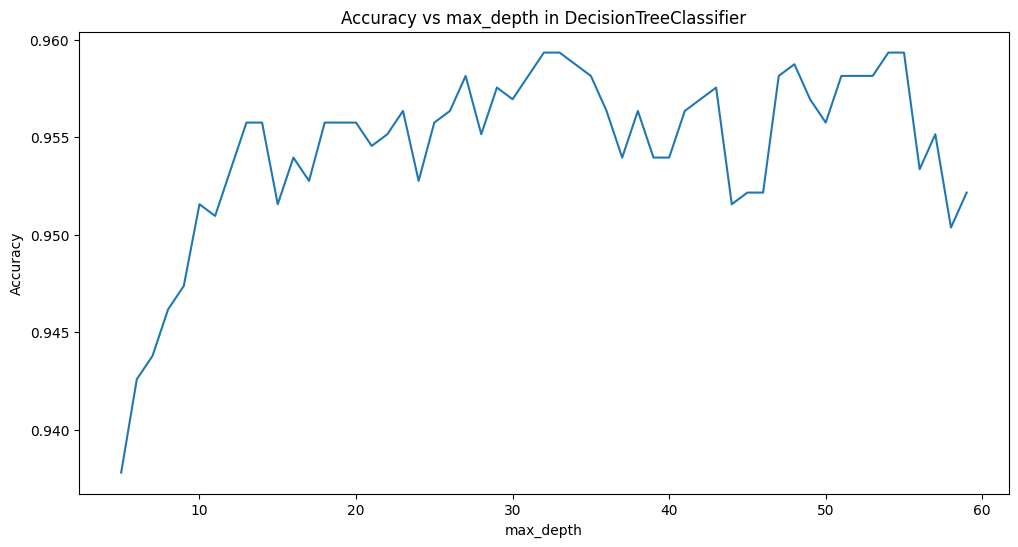

Best accuracy is:  0.9593301435406698
It was received for max_depth =  32


In [187]:
#Visualising data

depths = [x[0] for x in list]
accs = [x[1] for x in list]

plt.figure(figsize=(12, 6))  # Rozmiar wykresu
plt.plot(depths, accs)

plt.title('Accuracy vs max_depth in DecisionTreeClassifier')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

plt.show()

best_d = 0
best_a = 0

for d, a in list:
    if a > best_a:
        best_a = a
        best_d = d

print("Best accuracy is: ", best_a)
print("It was received for max_depth = ", best_d)

### Using RandomForestClassifier

It creates not one, but a lot of decision trees - the risk of overfitting is lower, but needs more time.

In [188]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

start = time.time()
y_exp = model.predict(X_test)
end = time.time()

time_3 = end-start
acc_3 = accuracy_score(y_test, y_exp)

print("Using decision tree classifier - results\n")
print("Accuracy: ", acc_3)
print("Time of process: ", time_3)

Using decision tree classifier - results

Accuracy:  0.9671052631578947
Time of process:  0.029811620712280273


### Using AdaBoost and Logistic Regression

Adaptive Boosting model creates lot of weak models and iterates through them to generate stronger model made of the best classifiers.

In [189]:
base = LogisticRegression()
model = AdaBoostClassifier(estimator = base, algorithm='SAMME')
model.fit(X_train, y_train)

start = time.time()
y_exp = model.predict(X_test)
end = time.time()

time_4 = end-start
acc_4 = accuracy_score(y_test, y_exp)

print("Using AdaBoost with logistic regression as base model - results\n")
print("Accuracy: ", acc_4)
print("Time of process: ", time_4)

Using AdaBoost with logistic regression as base model - results

Accuracy:  0.9730861244019139
Time of process:  0.009899616241455078


### Using simple AdaBoost

In [190]:
model = AdaBoostClassifier(algorithm='SAMME')
model.fit(X_train, y_train)

start = time.time()
y_exp = model.predict(X_test)
end = time.time()

time_5 = end-start
acc_5 = accuracy_score(y_test, y_exp)

print("Using simple AdaBoost - results\n")
print("Accuracy: ", acc_5)
print("Time of process: ", time_5)

Using simple AdaBoost - results

Accuracy:  0.9491626794258373
Time of process:  0.029386281967163086


### Using XGBoost

XGBoost is gradient boosting technique which iteratively creates decision trees that minimalizes cost function.

In [191]:
#XGB expects binary values of both classes - 0 and 1 - so "ham" and "spam" needs to be encoded

y_train_2 = np.where(y_train == 'ham', 0, 1)
y_test_2 = np.where(y_test == 'ham', 0, 1)

model = XGBClassifier()
model.fit(X_train, y_train_2)

start = time.time()
y_exp_2 = model.predict(X_test)
end = time.time()

time_6 = end-start
acc_6 = accuracy_score(y_test_2, y_exp_2)

print("Using XGBoost - results\n")
print("Accuracy: ", acc_6)
print("Time of process: ", time_6)

Using XGBoost - results

Accuracy:  0.9635167464114832
Time of process:  0.0025489330291748047


### Comparision of different techniques

In [192]:
results = {
    'Classifier': ['Logistic Regression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoost with Logistic Regression', 'default AdaBoost', 'XGBoost'],
    'Accuracy': [acc_1, acc_2, acc_3, acc_4, acc_5, acc_6],
    'Time': [time_1, time_2, time_3, time_4, time_5, time_6]
}

df = pd.DataFrame(results)
df

,Classifier,Accuracy,Time
0,Logistic Regression,0.963517,0.000662
1,DecisionTreeClassifier,0.957536,0.000855
2,RandomForestClassifier,0.967105,0.029812
3,AdaBoost with Logistic Regression,0.973086,0.009900
4,default AdaBoost,0.949163,0.029386
5,XGBoost,0.963517,0.002549


## Summarization

After performing calculations with six different classifiers there could be a lot of observations:
- the chosen dataset is rather simple - most of used models were able to predict results with good accuracy (> 95%)
- one of the best results were achieved using **Random Forest Classifier**, but it took a lot of time
- **Boosting** didn't help in improving models when it was using decision trees
- combination of **Adaptive Boosting with logistic regression** resulted in the best accuracy
- **Extreme Gradient Boosting** was much better than default Adaptive Boosting - quicker and more accurate

Conclusions:
- simple **logistic regression** appeared to be the best classifier for this dataset - probably beacuse of the linearity of the problem
- it could be even improved by using **AdaBoosting** - but calculations lasts 10 times longer
- if the dataset was different, f.e. not text-based, the results of the used classifiers would probably be completely different
- we could see that sometimes the easiest option might be the best one